# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from numpy.random import seed

import os
plt.style.use('dark_background')
# show output for multiple statements per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
os.getcwd() # check working directory

'C:\\Users\\forre\\Data science projects\\GIT local\\Springboard\\Frequentist Case Study'

In [8]:
medical = pd.read_csv('insurance2.csv')

In [9]:
medical.shape

(1338, 8)

In [10]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ 

charges mean: 13270.42
charges  std. dev.: 12105.48

The large std. deviation indicates that the mean in not very informative here, since many values are much higher or lower.

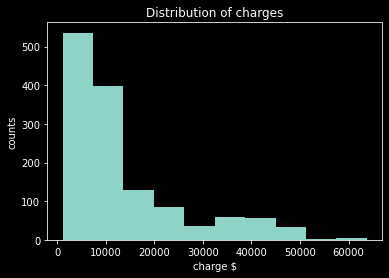

In [23]:
_= plt.hist(medical.charges)
_= plt.xlabel('charge $')
_= plt.ylabel('counts')
_=plt.title('Distribution of charges')

In [24]:
print('charges mean: '+str(round(medical.charges.mean(), 2)))

print('charges  std. dev.: '+str(round(medical.charges.std(ddof = 0), 2)))
 

charges mean: 13270.42
charges  std. dev.: 12105.48


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In this situation we can determine the 95% confidence interval for the mean using the t distribution, and use this to calculate the 95% confidence interval for the mean.

Aim to test the null hypothesis that the average charge = 12,000.

If 12,000 does not fall within the 95% confidence interval then we can say that there is a 95% chance that the mean has changed from 12000.


In [25]:
print('charges mean: '+str(round(medical.charges.mean(), 2)))

print('charges population std. dev.: '+str(round(medical.charges.std(), 2)))


charges mean: 13270.42
charges population std. dev.: 12110.01


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 
A one sided t-test is sufficient, since we are primarily concerned with detecting if mean charge fell below 12000.

charges mean: 13270.42
95% confidence interval: (-6662.58, 33203.43)

This indicates that there is greater than 95% chance that the true mean has not decreased


In [40]:
# Initial inputs
sample_size = len(medical.charges)

dof = sample_size - 1

sample_mean = medical.charges.mean()

std_error = medical.charges.std()

# t_crit, margin of error, and confidenc interval
t_critical = t.ppf(q = 0.95, df = dof)

margin_of_error= t_critical*std_error

confidence_interval = (round((sample_mean - margin_of_error), 2), 
                       round((sample_mean + margin_of_error), 2))


In [41]:
print('charges mean: '+str(round(medical.charges.mean(), 2)))
print('95% confidence interval: '+str(confidence_interval))

charges mean: 13270.42
95% confidence interval: (-6662.58, 33203.43)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

*Nice example:*
http://gureckislab.org/courses/fall19/labincp/chapters/11/00-ttest.html

__A:__

Null hypothesis: the average charge is the insured and uninsured groups
Alternative hypothesis: the average charge for the insured group is different from that of the uninsured group

We are making the assumption that the sample variances are the same for the population, when they are likely slightly smaller.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

manual t-test:
t_statistic: -11.89329903087671
crit_value: 1.6459949688112576
p_value: 0.0

scipy t-test: statistic=-11.893299030876712, pvalue=4.461230231620717e-31

The results are nearly the same, in the manual test it appears that rounding may have led to a p-value of zero.

Either way, these results indicate that the two group means are not equal.

In [87]:
# group charges by insurance claim and calculate means
# x_bar_0 = mean charge for group 0 (uninsured)
# s_1 = standard deviation of charges for group 1 (insured)
# n _1 = number of observations in group 1
uninsured_charges = medical[medical['insuranceclaim']==0]['charges']
insured_charges = medical[medical['insuranceclaim']==1]['charges']

## Define initial inputs
x_bar_0 = medical[medical['insuranceclaim']==0]['charges'].mean()
x_bar_1 = medical[medical['insuranceclaim']==1]['charges'].mean()

s_0 = avg_charge_0 = medical[medical['insuranceclaim']==0]['charges'].std()
s_1 = avg_charge_0 = medical[medical['insuranceclaim']==1]['charges'].std()

n_0 = medical[medical['insuranceclaim']==0]['charges'].shape[0]

n_1 = medical[medical['insuranceclaim']==1]['charges'].shape[0]


In [96]:
# Calculate s_p, pooled standard deviation
s_p = np.sqrt(((n_0 - 1)*s_0**2 + (n_1 - 1)*s_1**2)/ (n_0 + n_1 - 2))

# calculate t statistic
t_stat = (x_bar_0 - x_bar_1)/(s_p*np.sqrt(1/n_0 + 1/n_1))

# degrees of freedom
df = n_0 + n_1 - 2

# critical value
alpha = 0.05
crit_val = t.ppf(1 - alpha, df)

# calculate p value
p = (1-t.cdf(abs(t_stat), df))*2
print('manual t-test')
print('t_statistic: '+str(t_stat))
print('crit_value: '+ str(crit_val))
print('p_value: '+str(p) )

manual t-test
t_statistic: -11.89329903087671
crit_value: 1.6459949688112576
p_value: 0.0


In [94]:
t_test = stats.ttest_ind(uninsured_charges, insured_charges)

In [97]:
print('scipy t-test')
t_test

scipy t-test


Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

It appears that there is not a scipy.stats function, however there is a z-score function

This is likely because in real world scenarios there is never complete data about a population, therefore the assumption of knowing the population standard deviation for the z-test is violated and the t-test is more appropiate.


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test